In [2]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
import matplotlib.pyplot as plt
import seaborn as sn
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import cross_val_score

In [3]:
plt.rcParams["font.family"] = "serif"
plt.rcParams["font.size"] = 11

In [11]:
# Read the data file
df = pd.read_pickle('10_first_ppl_100_rots.pkl')

In [10]:
# --------------------------------------
# SECOND STAGE MODEL TRAINING
# --------------------------------------

model2 = []   # For storing trained models
X_train2 = [0]*5   # For storing training images, sorted by finger
X_test2 = [0]*5   # For storing testing images, sorted by finger
y_train2 = [0]*5   # For storing training identities, sorted by finger
y_test2 = [0]*5   # For storing testing identities, sorted by finger

for i in range(0,5):
    X = list(df[df.Finger==i]["Image"])
    y = df[df.Finger==i]["Identity"]
    X_train2[i], X_test2[i], y_train2[i], y_test2[i] = train_test_split(X,y,test_size=0.2)
    model2.append(RandomForestClassifier())
    model2[i].fit(X_train2[i],y_train2[i])
    
# --------------------------------------
# END OF SECOND STAGE MODEL TRAINING
# --------------------------------------

In [12]:
# -------------------------------------
# FIRST STAGE MODEL TRAINING
# -------------------------------------
X_train = []
X_test = []
for i in range(len(X_train2)):
    X_train += X_train2[i]
for i in range(len(X_test2)):
    X_test += X_test2[i]
y_train_id = pd.concat(y_train2)
y_test_id = pd.concat(y_test2)
y_train = [] # Finger
y_test = [] # Finger

for i in range(len(y_train_id)):
    j = y_train_id.index[i]
    y_train.append([df["Finger"][j],j])
for i in range(len(y_test_id)):
    j = y_test_id.index[i]
    y_test.append([df["Finger"][j],j])
    
y_train_indexfree = [i[0] for i in y_train]

model_finger = RandomForestClassifier()
model_finger.fit(X_train,y_train_indexfree) # Fit the model fo training data
# -------------------------------------
# END OF FIRST STAGE MODEL TRAINING
# -------------------------------------

RandomForestClassifier()

In [45]:
# --------------------------------------
# MODEL IMPLEMENTATION
# --------------------------------------
pred_finger = model_finger.predict(X_test)

X_pred = [[] for _ in range(5)]  # Images sorted by predicted finger
y_true = [[] for _ in range(5)]  # True identities sorted by predicted finger


for i in range(len(pred_finger)):
    finger = pred_finger[i]
    X_pred[finger].append(X_test[i])
    index = y_test[i][1]
    y_true[finger].append(df["Identity"][index])

pred_id = [[] for _ in range(5)]

for i in range(5):
    pred_id[i] = model2[i].predict(X_pred[i])
# --------------------------------------
# END OF MODEL IMPLEMENTATION
# --------------------------------------

In [48]:
# --------------------------------------
# EVALUATION OF RESULTS
# --------------------------------------
# Calculate accuracy
succs = 0  # Number of successful predictions
for i in range(len(pred_id)):
    for j in range(len(pred_id[i])):
        if pred_id[i][j] == y_true[i][j]:
            succs+=1
print("Accuracy: " + str(succs/len(X_test)))
print("Successful predictions: " + str(succs))
# --------------------------------------
# END OF EVALUATION OF RESULTS
# --------------------------------------

Accuracy: 0.2825
Successful predictions: 565


#### 10_first_ppl_100_rots, gender
0.09700000000000007
0
0.09700000000000007

0.10450000000000008
0
0.10450000000000008

In [54]:
np.concatenate(y_true)

array([9, 4, 8, ..., 7, 8, 8])

In [49]:
pred_id = np.concatenate(pred_id)
y_true = np.concatenate(y_tr

NameError: name 'pred_lid' is not defined

Text(33.0, 0.5, 'Truth')

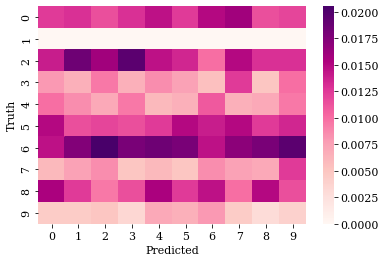

In [23]:
# Confusion matrix
cm = confusion_matrix(pred_id, y_both, normalize='all') # Remove 'normalize="all"' to get absolute numbers
plt.figure()
sn.heatmap(cm, annot=False, cmap='RdPu')
# plt.title('Confusion matrix for 2-stage prediction of identity')
plt.xlabel('Predicted')
plt.ylabel('Truth')